# Donjon Facile

Après une nuit de révision à base de boissons que le règlement intérieur réprouve, vous vous réveillez avec une sensibilité accrue au bruit, des cheveux qui piquent, et absolument aucune idée de pourquoi votre chambre est en pierre avec de la mousse sur les murs et une absence notable de fenêtres.

A côté de vous se trouve une carte du donjon et un message énigmatique : "The computing scientist’s main challenge is not to get confused by the complexities of his own making.", signé "EWD".

## Quelques règles

Vous allez devoir vous échapper du donjon. Sur la carte qui vous est fournie plus bas, vous verrez le plan avec les différentes salles, et des indications sur le point de départ ("S", *start*), la sortie ("E", *exit*), les portes fermées (marquées en rouge), ainsi que des objets ("W" : arme, "P" : potion, "C" : coffre, "A" : armure). Comme vous êtes étudiante ou étudiant en informatique, vous avez avec vous de quoi faire un peu de programmation, et vous sentez que vous allez devoir sortir assez rapidement.

On se déplace sur la carte dans les quatres directions cardinales, mais pas en diagonale. Chaque déplacement coûte une unité de temps, et votre objectif est de rejoindre la sortie le plus rapidement possible.

Vous disposez de deux versions de la carte : une version graphique, et un fichier texte (ouvrez le et regardez comment il est fait) qui représente les différentes cases du donjon. Il y a plusieurs types de cases :

- des cases impénétrables/intraversables : 
  - les murs des pièces : **@** 
  - les murs du donjon : **#**
- des cases représentant des portes fermées : **D**. En fonction de la partie que vous traitez, ces cases seront ou non traversables
- des cases représentant le sol :
  - des pièces : **\<espace\>** 
  - des couloirs : **\_**
- des points d'intérêt qui se comportent comme du sol pour le déplacement :
  - le point de départ : **S**
  - la sortie : **E**
  - une clef : **K**
  - des objets à ramasser (partie 2 et 3) : **W** (arme), **P** (potion), **C** (coffre) et **A** (armure)

Mettre ci-dessous votre numéro d'instance, puis lancer une fois l'exécution de tout le carnet pour afficher l'image et charger les données :

In [1]:
NUM_INSTANCE = 68

On vous donne le plan du donjon :

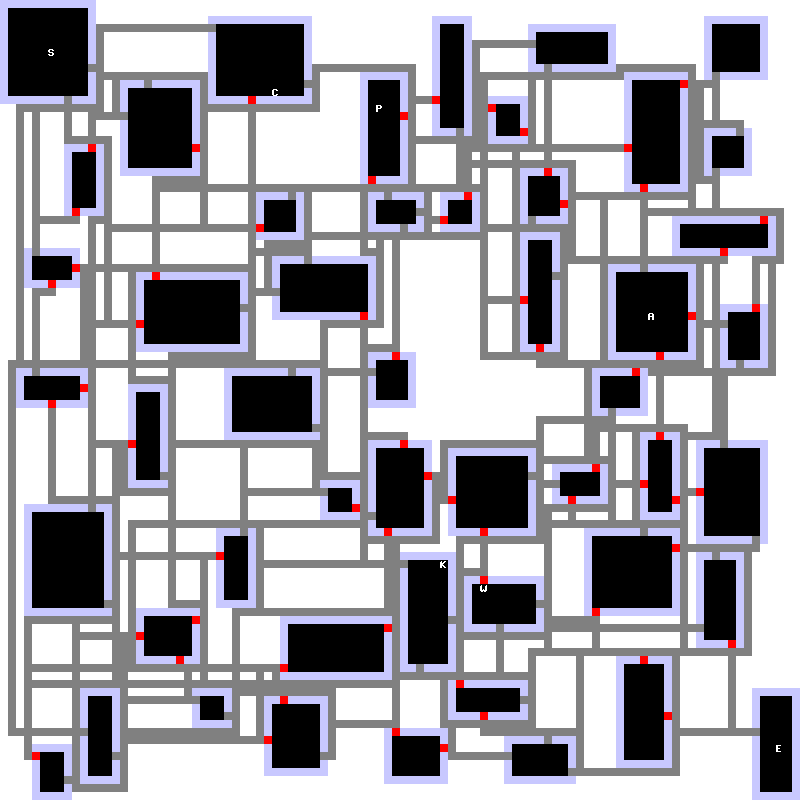

In [2]:
from IPython.display import Image
Image(filename=f'donjon_{NUM_INSTANCE}.png') 

Imports

In [3]:
import heapq
from collections import defaultdict
from math import inf
from itertools import permutations
# permutations(liste, k) prend une liste ou une chaîne de caractères en entrée et sort toutes les permutations possibles de longueur k
# Exemple : permutations('ABCD', 2) → AB AC AD BA BC BD CA CB CD DA DB DC

Fonctions utiles pour la recherche de solutions :

In [4]:
def find_poi(carte: list[list[str]], poi: str) -> tuple[int, int]:
    """Trouve les coordonnées d'un point d'intérêt sur une carte.

    entrée :  une carte sous forme de liste de liste de caractères,
    et un point d'intérêt (un caractère, par exemple "S" pour le point de départ).

    sortie : les coordonnées (i,ji) du point, et None s'il n'existe pas.
    """
    for i in range(len(carte)):
        for j in range(len(carte[0])):
            if carte[i][j] == poi:
                return (i, j)

On charge les données :

In [5]:
with open(f'donjon_{NUM_INSTANCE}.txt') as f:
    data = [[c for c in line.strip()] for line in f.readlines()]

## Partie 1

Dans un premier temps, on considère que toutes les portes sont ouvertes, les cases rouges sont donc considérées comme vides. Les cases particulières (S, E, K, C, P, W et A) sont aussi traitées comme des cases vides.

### Exercice 1

Compléter les code ci-dessous pour calculer le plus court chemin d'un point *a* vers un point *b* en utilisant la *carte* du donjon.

In [6]:
def est_impenetrable(case : str) -> bool:
    if case == '@': return True
    if case == '#': return True
    return False

def est_sol(case: str) -> bool:
    if case == '_': return True
    if case == ' ': return True
    if case == 'S': return True
    if case == 'E': return True
    if case == 'K': return True
    if case == 'W': return True
    if case == 'P': return True
    if case == 'C': return True
    if case == 'A': return True
    return False

def remplir_voisins(smt: tuple[int, int]) -> list:
    voisins = []
    coordX = smt[0]
    coordY = smt[1]
    
    voisins.append((coordX, coordY+1))
    voisins.append((coordX, coordY-1))

    voisins.append((coordX+1, coordY+1))
    voisins.append((coordX+1, coordY))
    voisins.append((coordX+1, coordY-1))

    voisins.append((coordX-1, coordY+1))
    voisins.append((coordX-1, coordY))
    voisins.append((coordX-1, coordY-1))

    return voisins


In [7]:
assert est_impenetrable("S") == False
assert est_sol(" ") == True

In [8]:
def plus_court_chemin(carte: list[list[str]], a: tuple[int, int], b: tuple[int, int]) -> int:
    """Trouve le plus court chemin entre deux points d'intérêt dans une carte dont toutes les portes sont ouvertes.
    
    Entrée : 
        - une carte sous forme de liste de liste de caractères,
        - un point d'intérêt a sous forme de tuple (x, y)
        - un point d'intérêt b sous forme de tuple (x, y)

    Sortie : la distance la plus courte entre a et b.
    """
    
    # On initialise avec un defaultdict
    vus = defaultdict(lambda: False)

    # On initialise le sac
    sac = []

    # On utilise heapq pour le sac à priorité
    heapq.heappush(sac, (0, a))

    # Puis, on procède de manière similaire, avec heapq au lieu de nos listes simples et retrait d'élément manuels
    vus[a] = 0

    print(sac)

    while len(sac) > 0:
        # On extrait le chemin de distance minimale
        (chemin, smt) = heapq.heappop(sac)
        
        # On a trouvé le sommet de destination
        if smt == b: return chemin
        
        # On marque le sommet comme vu
        if vus[smt]: continue
        else: vus[smt] = True

        # On donne les voisins visitables
        voisins = remplir_voisins(smt)

        # On met à jour les distances des voisins
        for voisin in voisins:
            poids = 1
            val = carte[voisin[0]][voisin[1]]

            # On vérifie qu'on peut se rendre dans la case
            if est_impenetrable(val): continue

            if not vus[voisin]:
                # On calcule la nouvelle distance
                nouvelle_distance = chemin + poids

                # On met à jour le sac
                heapq.heappush(sac, (nouvelle_distance, voisin))
    return -1  # On n'a pas trouvé de chemin

On fait maintenant tourner l'algorithme en allant du départ *S* jusqu'à la sortie *E*

In [9]:
a = find_poi(data, "S")
b = find_poi(data, "E")
d = plus_court_chemin(data, a, b)

[(0, (6, 6))]


On vérifie qu'on a bien une solution et si oui, on affiche son coût.

In [10]:
if d == -1:
    print("Erreur : pas de chemin trouvé entre S et E.")
else:
    print("Le temps nécessaire pour aller de S vers E avec toutes les portes considérées comme ouvertes est :", d)

Le temps nécessaire pour aller de S vers E avec toutes les portes considérées comme ouvertes est : 128


Si vous n'avez pas réussi à coder votre algorithme, expliquez ici (modifiez cette cellule) ce que vous auriez voulu faire (en pseudo-code ou en français).

## Partie 2

On va maintenant explorer le donjon de manière un peu plus réaliste : certaines portes (marquées en rouge) sont fermées, et il y a des objets à récupérer (une arme "W", une armure "A", un coffre "C", une potion "P") et une clef "K" qui permet d'ouvrir les portes fermées.

Il faut maintenant récupérer tous les objets (W, A, C et P) avant de sortir, et si besoin, la clef.

### Exercice 2

En partant du point de départ, commencez par récupérer la clef. Combien de temps faut-il ? Attention, les portes fermées vous bloquent désormais.

In [11]:
def plus_court_chemin_2(
    carte: list[list[str]], a: tuple[int, int], b: tuple[int, int]
) -> int:
    """Trouve le plus court chemin entre deux points d'intérêt dans une carte sans passer par les portes fermées.
    
    Entrée : 
        - une carte sous forme de liste de liste de caractères,
        - un point d'intérêt a sous forme de tuple (x, y)
        - un point d'intérêt b sous forme de tuple (x, y)

    Sortie : la distance la plus courte entre a et b.
    """
    ...

In [12]:
a = find_poi(data, "S")
b = find_poi(data, "K")
print(a, b)
d = plus_court_chemin_2(data, a, b)
if d < inf:
    print("Le temps nécessaire pour aller de S vers K est :", d)
else:
    print("Erreur : pas de chemin trouvé entre S et K.")

(6, 6) (70, 55)


TypeError: '<' not supported between instances of 'NoneType' and 'float'

Si vous n'avez pas réussi à coder votre algorithme, expliquez ici (modifiez cette cellule) ce que vous auriez voulu faire (en pseudo-code ou en français).

Maintenant que vous avez la clef, vous allez pouvoir récupérer les différents objets avant de sortir.

Il faudra commencer par calculer tous les plus courts chemins entre les objets (autres que la clef), de la clef vers chacun des objets et de chacun des objets vers la sortie.

### Exercice 3

Combien de temps vous faut-il **au total** pour aller récupérer la clef, puis tous les objets, et enfin vous enfuir ?

Quel est le plus court chemin (répondre au format ABCDEFG, par exemple SKABCDE) correspondant ?

In [ ]:
meilleur_temps = inf
ordre = ""

# On calcule les plus courts chemins entre chaque paire d'objets (A, W, C, P)
...

# On calcule les plus courts chemins de la clef vers chaque objet
...

# On calcule les plus courts chemins de chaque objet vers la sortie
...

# Et enfin on cherche quelle permutation est la plus rapide
...

print(f"Le meilleur parcours est : SK{''.join(ordre)}E et il prend un temps de : {meilleur_temps}")

Si vous n'avez pas réussi à coder votre algorithme, expliquez ici (modifiez cette cellule) ce que vous auriez voulu faire (en pseudo-code ou en français).

## Partie 3

On va maintenant vraiment explorer le donjon, en essayant d'aller le plus vite possible. On veut encore une fois ramasser tous les objets avant de sortir, mais cette fois sans nécessairement prendre la clef, ou peut-être en ne la prenant pas au début.

### Exercice 4

Quel est le plus court temps **total** possible pour récupérer l'arme, l'armure, la potion et le coffre puis sortir ?

Quel est le plus court chemin (répondre au format ABCDEFG ou ABCDEF, par exemple SKABCDE ou SABCDE) correspondant ?

In [ ]:
# A vous de modifier (copiez le ici avant) ce qui a été fait précédemment
# Si besoin, vous pouvez ajouter vos propres fonctions

...

On affiche ensuite la solution et le temps associé :

In [ ]:
print(f"Le meilleur parcours est : {ordre} et il prend un temps de : {meilleur_temps}")

Si vous n'avez pas réussi à coder votre algorithme, expliquez ici (modifiez cette cellule) ce que vous auriez voulu faire (en pseudo-code ou en français).